In [1]:
import dask_awkward as dak
import numpy as np
from coffea.dataset_tools import preprocess
from distributed import Client
from matplotlib import pyplot as plt

import egamma_tnp
from egamma_tnp import ElectronTagNProbeFromNTuples
from egamma_tnp.plot import plot_efficiency

In [2]:
client = Client()

In [3]:
fileset = {
    "samples": {
        "files": {
            "../root_files/Egamma0.root": "Events",
            "../root_files/Egamma1.root": "Events",
        }
    }
}

fileset_available, fileset_updates = preprocess(fileset, skip_bad_files=True, step_size=500_000)

In [4]:
tnp = egamma_tnp.ElectronTagNProbeFromNanoAOD(
    fileset_available,
    True,
    filter="asdf",
    filterbit=1,
    tags_pt_cut=30,
    use_sc_eta=True,
    tags_abseta_cut=2.50,
    probes_pt_cut=27,
    trigger_pt=30,
    hlt_filter="Ele32_WPTight_Gsf",
)

egamma_tnp.config.set("MET_pt_bins", np.linspace(0, 200, 21).tolist())
egamma_tnp.config.set("luminosityBlock_bins", np.linspace(0, 1000, 11).tolist())
egamma_tnp.config.set("tag_Ele_pt_bins", egamma_tnp.config.get("pt_bins"))
egamma_tnp.config.set("Electron_pt_bins", egamma_tnp.config.get("pt_bins"))

In [5]:
dak.necessary_columns(tnp.get_tnp_arrays(cut_and_count=False, vars=["Electron_pt", "tag_Ele_eta", "el_pt", "el_eta", "MET_pt", "luminosityBlock"]))

/Users/iason/miniforge3/envs/egamma_dev/lib/python3.10/site-packages/coffea/nanoevents/methods/candidate.py:11: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


{'from-uproot-79e3ecd01474e06d4436304834c219f7': frozenset({'Electron_charge',
            'Electron_deltaEtaSC',
            'Electron_eta',
            'Electron_mass',
            'Electron_phi',
            'Electron_pt',
            'HLT_Ele30_WPTight_Gsf',
            'HLT_Ele32_WPTight_Gsf',
            'MET_pt',
            'TrigObj_eta',
            'TrigObj_filterBits',
            'TrigObj_id',
            'TrigObj_phi',
            'TrigObj_pt',
            'luminosityBlock',
            'nElectron',
            'nTrigObj'})}

In [6]:
dak.necessary_columns(tnp.get_nd_tnp_histograms(cut_and_count=True, vars=["tag_Ele_pt", "el_pt", "el_eta", "MET_pt", "luminosityBlock"]))

{'from-uproot-79e3ecd01474e06d4436304834c219f7': frozenset({'Electron_charge',
            'Electron_deltaEtaSC',
            'Electron_eta',
            'Electron_mass',
            'Electron_phi',
            'Electron_pt',
            'HLT_Ele30_WPTight_Gsf',
            'HLT_Ele32_WPTight_Gsf',
            'MET_pt',
            'TrigObj_eta',
            'TrigObj_filterBits',
            'TrigObj_id',
            'TrigObj_phi',
            'TrigObj_pt',
            'luminosityBlock',
            'nElectron',
            'nTrigObj'})}

In [7]:
out = tnp.get_tnp_arrays(cut_and_count=False, vars=["Electron_pt", "tag_Ele_eta", "el_pt", "el_eta", "MET_pt", "luminosityBlock"], compute=True)

/Users/iason/miniforge3/envs/egamma_dev/lib/python3.10/site-packages/coffea/nanoevents/methods/candidate.py:11: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/Users/iason/miniforge3/envs/egamma_dev/lib/python3.10/site-packages/coffea/nanoevents/methods/candidate.py:11: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to fin

In [8]:
out["samples"]["passing"]

<Array [{Electron_pt: [...], ...}, ..., {...}] type='9436 * {Electron_pt: v...'>

In [9]:
out["samples"]["passing"].Electron_pt

<Array [[42.6, 34.2], [...], ..., [52, 38.3]] type='9436 * var * float32[pa...'>

In [10]:
out["samples"]["passing"].el_pt

<Array [34.2, 41.4, 40.8, ..., 36.2, 38.3] type='9436 * float32[parameters=...'>

In [11]:
out = tnp.get_1d_pt_eta_phi_tnp_histograms(
    cut_and_count=True,
    vars=["tag_Ele_pt", "el_eta", "el_phi"],
    eta_regions_pt={
        "barrel": [0.0, 1.4442],
        "endcap_loweta": [1.566, 2.0],
        "endcap_higheta": [2.0, 2.5],
    },
    plateau_cut=35,
    compute=True,
)

/Users/iason/miniforge3/envs/egamma_dev/lib/python3.10/site-packages/coffea/nanoevents/methods/candidate.py:11: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/Users/iason/miniforge3/envs/egamma_dev/lib/python3.10/site-packages/coffea/nanoevents/methods/candidate.py:11: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to fin

In [12]:
out = tnp.get_nd_tnp_histograms(cut_and_count=True, vars=["tag_Ele_pt", "el_pt", "el_eta", "MET_pt", "luminosityBlock"], compute=True)

/Users/iason/miniforge3/envs/egamma_dev/lib/python3.10/site-packages/coffea/nanoevents/methods/candidate.py:11: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


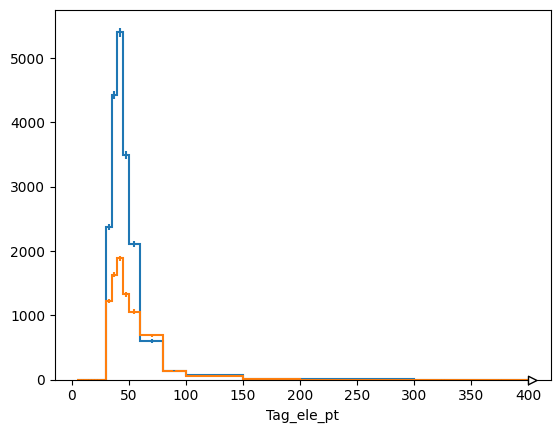

In [13]:
out["samples"]["passing"].project("tag_Ele_pt").plot()
out["samples"]["failing"].project("tag_Ele_pt").plot()
plt.show()

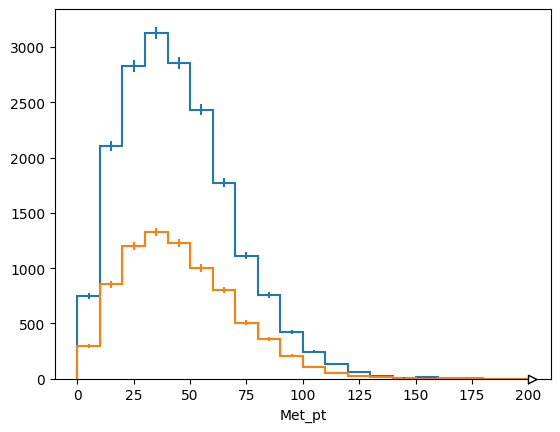

In [14]:
out["samples"]["passing"].project("MET_pt").plot()
out["samples"]["failing"].project("MET_pt").plot()
plt.show()

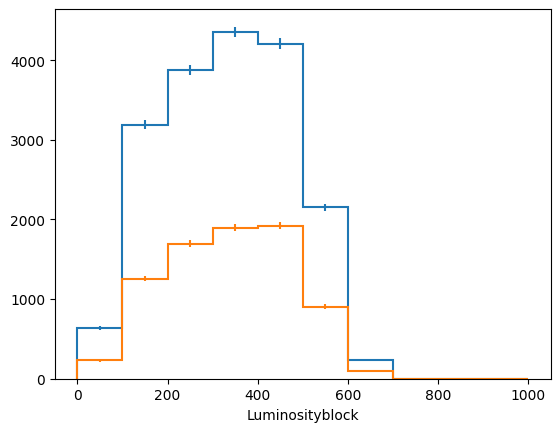

In [15]:
out["samples"]["passing"].project("luminosityBlock").plot()
out["samples"]["failing"].project("luminosityBlock").plot()
plt.show()

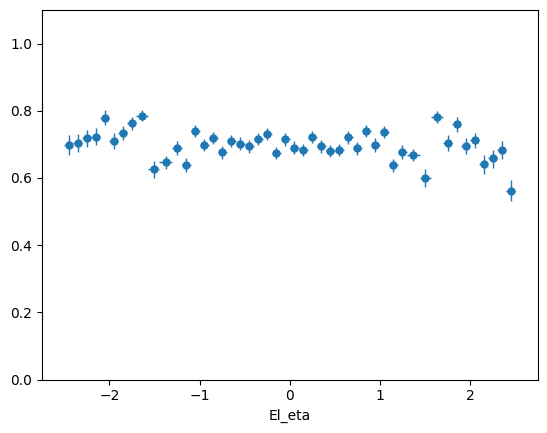

In [16]:
plot_efficiency(out["samples"]["passing"].project("el_eta"), out["samples"]["failing"].project("el_eta"))
plt.ylim(0, 1.1)
plt.show()

In [17]:
egamma_tnp.config.reset_all()

In [18]:
fileset = {
    "Run2023D": {"files": {"../tnptuples/data_EGamma_Run2023D.root": "tnpEleTrig/fitter_tree"}},
    "DY_LO_2023postBPIX": {"files": {"../tnptuples/mc_DY_LO_2023postBPIX.root": "tnpEleTrig/fitter_tree"}},
}

fileset_available, fileset_updates = preprocess(fileset, skip_bad_files=True, step_size=500_000)

In [19]:
tnp = ElectronTagNProbeFromNTuples(
    fileset_available,
    "passHltEle30WPTightGsf",
    cutbased_id="passingCutBasedTight122XV1",
    use_sc_eta=True,
    tags_pt_cut=30,
    probes_pt_cut=35,
)

egamma_tnp.config.set("truePU_bins", np.arange(0, 110, 10).tolist())
egamma_tnp.config.set("tag_sc_eta_bins", egamma_tnp.config.get("eta_bins"))
egamma_tnp.config.set("tag_Ele_eta_bins", egamma_tnp.config.get("eta_bins"))

In [20]:
dak.necessary_columns(tnp.get_tnp_arrays(vars=["el_eta", "el_phi", "truePU", "tag_Ele_eta"]))

{'from-uproot-2c52399d185aa7e689447a11d8ee9318': frozenset({'el_eta',
            'el_phi',
            'el_pt',
            'el_q',
            'pair_mass',
            'passHltEle30WPTightGsf',
            'passingCutBasedTight122XV1',
            'tag_Ele_eta',
            'tag_Ele_pt',
            'tag_Ele_q',
            'tag_sc_eta',
            'truePU'}),
 'from-uproot-7198601bdadd417090f83f56563f0a20': frozenset({'el_eta',
            'el_phi',
            'el_pt',
            'el_q',
            'pair_mass',
            'passHltEle30WPTightGsf',
            'passingCutBasedTight122XV1',
            'tag_Ele_eta',
            'tag_Ele_pt',
            'tag_Ele_q',
            'tag_sc_eta',
            'truePU'})}

In [21]:
dak.necessary_columns(tnp.get_nd_tnp_histograms(vars=["el_eta", "el_phi", "truePU", "tag_Ele_eta"]))

{'from-uproot-2c52399d185aa7e689447a11d8ee9318': frozenset({'el_eta',
            'el_phi',
            'el_pt',
            'el_q',
            'pair_mass',
            'passHltEle30WPTightGsf',
            'passingCutBasedTight122XV1',
            'tag_Ele_eta',
            'tag_Ele_pt',
            'tag_Ele_q',
            'tag_sc_eta',
            'truePU'}),
 'from-uproot-7198601bdadd417090f83f56563f0a20': frozenset({'el_eta',
            'el_phi',
            'el_pt',
            'el_q',
            'pair_mass',
            'passHltEle30WPTightGsf',
            'passingCutBasedTight122XV1',
            'tag_Ele_eta',
            'tag_Ele_pt',
            'tag_Ele_q',
            'tag_sc_eta',
            'truePU'})}

In [22]:
out = tnp.get_tnp_arrays(vars=["el_eta", "el_phi", "truePU", "tag_Ele_eta", "el_sc_eta", "tag_sc_eta"], compute=True)

In [23]:
out["Run2023D"]["passing"]

<Array [{el_eta: 0.916, el_phi: ..., ...}, ...] type='3194565 * {el_eta: fl...'>

In [24]:
out = tnp.get_1d_pt_eta_phi_tnp_histograms(
    cut_and_count=True,
    vars=["el_pt", "el_sc_eta", "el_phi"],
    eta_regions_pt={
        "barrel": [0.0, 1.4442],
        "endcap_loweta": [1.566, 2.0],
        "endcap_higheta": [2.0, 2.5],
    },
    plateau_cut=35,
    compute=True,
)

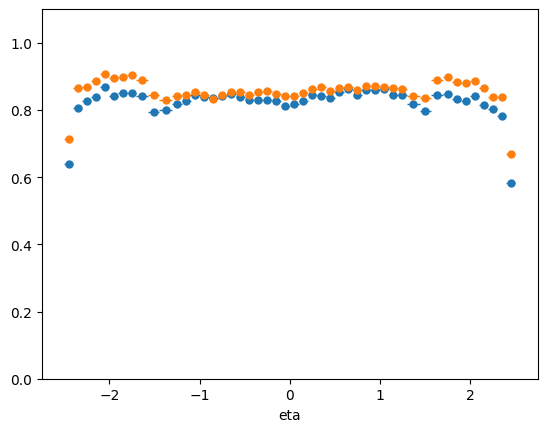

In [25]:
plot_efficiency(out["Run2023D"]["eta"]["entire"]["passing"], out["Run2023D"]["eta"]["entire"]["failing"])
plot_efficiency(out["DY_LO_2023postBPIX"]["eta"]["entire"]["passing"], out["DY_LO_2023postBPIX"]["eta"]["entire"]["failing"])
plt.ylim(0, 1.1)
plt.show()

In [26]:
out = tnp.get_nd_tnp_histograms(vars=["el_eta", "el_phi", "truePU", "tag_sc_eta"], compute=True)

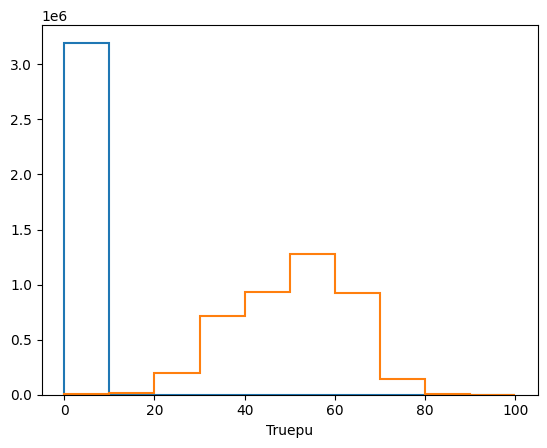

In [27]:
out["Run2023D"]["passing"].project("truePU").plot()
out["DY_LO_2023postBPIX"]["passing"].project("truePU").plot()
plt.show()

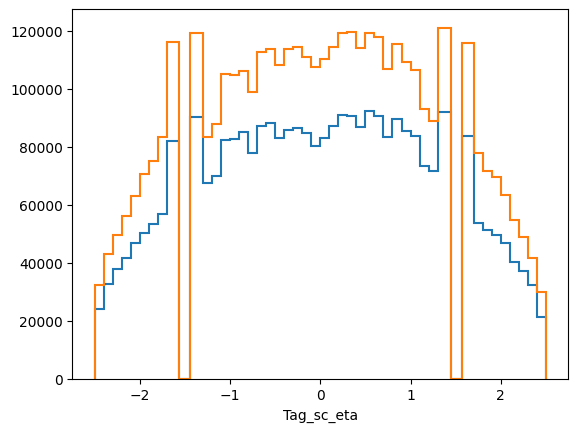

In [28]:
out["Run2023D"]["passing"].project("tag_sc_eta").plot()
out["DY_LO_2023postBPIX"]["passing"].project("tag_sc_eta").plot()
plt.show()

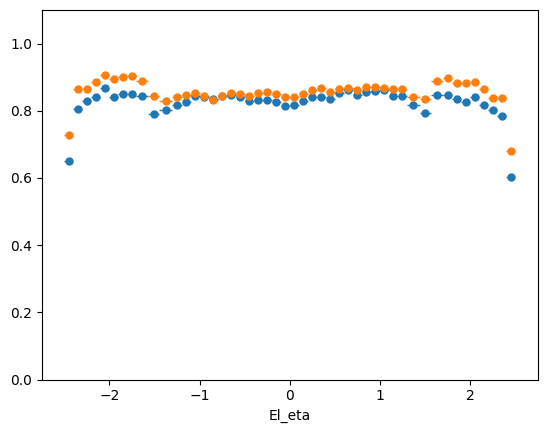

In [29]:
plot_efficiency(out["Run2023D"]["passing"].project("el_eta"), out["Run2023D"]["failing"].project("el_eta"))
plot_efficiency(out["DY_LO_2023postBPIX"]["passing"].project("el_eta"), out["DY_LO_2023postBPIX"]["failing"].project("el_eta"))
plt.ylim(0, 1.1)
plt.show()

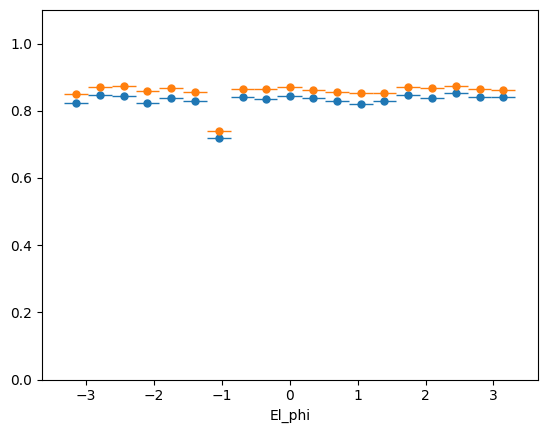

In [30]:
plot_efficiency(out["Run2023D"]["passing"].project("el_phi"), out["Run2023D"]["failing"].project("el_phi"))
plot_efficiency(out["DY_LO_2023postBPIX"]["passing"].project("el_phi"), out["DY_LO_2023postBPIX"]["failing"].project("el_phi"))
plt.ylim(0, 1.1)
plt.show()